# Lateral inhibition in FS networks

FS neurons are coupled together by both GABAergic synapses and gap junctions. If a group of FS neurons are stimulated stronger then their neighbours should be inhibited, but will this lead to disinhibition of the shell of neurons outside of the direct neighbours?

In [1]:
import os

network_path = os.path.join("..", "networks", "FS_lateral")
network_file = os.path.join(network_path, "network-synapses.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-FS_lateral-A.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-FS_lateral-A.hdf5")
duration = 20

# Local path for Snudda data
snudda_data = "/home/hjorth/HBP/BasalGangliaData/data"

## Identifying the different groups of neurons

First we need to identify the neurons that are inhibited, these are population unit 1. Then we want to find the direct neighbours to all those neurons.

In [2]:
from snudda import SnuddaLoad

sl = SnuddaLoad(network_path)

main_id = sl.get_population_unit_members(population_unit=1)
con_mat = sl.create_connection_matrix(sparse_matrix=False, connection_type="synapses")
pre_id, post_id = sl.find_neighbours(neuron_id=main_id, exclude_parent=True, connection_matrix=con_mat)
_, secondary_neighbour_id = sl.find_neighbours(neuron_id=post_id, exclude_parent=True, connection_matrix=con_mat)
secondary_neighbour_id -= set(main_id)

pop_unit2 = set(sl.get_population_unit_members(population_unit=2))

post_id = list(post_id - pop_unit2)
secondary_neighbour_id = list(secondary_neighbour_id - pop_unit2)

In [3]:
gj_con_mat = sl.create_connection_matrix(sparse_matrix=False, connection_type="gap_junctions")
gj_neighbours = sl.find_neighbours_gap_junctions(neuron_id=main_id, connection_matrix=gj_con_mat)

## Plot neuron positions

Orange are main neurons, red are direct neighbours, dark blue are secondary neighbours, and black dots are remaining neurons.

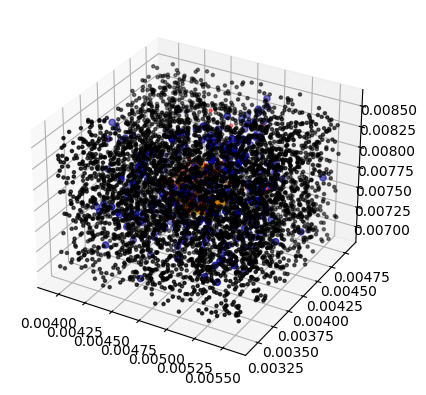

In [4]:
import matplotlib.pyplot as plt

positions = sl.data["neuron_positions"]

ax = plt.axes(projection='3d')

ax.scatter(*positions[main_id].T, s=50, color=(.8,.5,0), marker='o')
ax.scatter(*positions[post_id].T, s=20, color=(1.0,0,0), marker='.')
ax.scatter(*positions[secondary_neighbour_id].T, s=20, color=(0,0,.6), marker='o')

rest_id = list(set(sl.data["neuron_id"]) - set(main_id) - set(post_id) - set(secondary_neighbour_id))
ax.scatter(*positions[rest_id].T, s=20, color=(0,0,0), marker='.')

# Plot the firing frequency
Next we want to see how the ```main_id```, ```post_id``` and ```secondary_neighbour_id``` group change their frequencies during the run time.

In [5]:
from snudda.plotting import SnuddaPlotSpikeRaster2

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

Loading ../networks/FS_lateral/simulation/output-with-synapses-FS_lateral-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
55: (FS_0, p4feff98b, m86da4874)
88: (FS_0, pb1ef6b01, m86da4874)
89: (FS_0, p4feff98b, m86da4874)
91: (FS_0, p4feff98b, m86da4874)
140: (FS_0, pb1ef6b01, m15ae4048)
146: (FS_0, p59a48310, m15ae4048)
149: (FS_0, pb1ef6b01, m86da4874)
274: (FS_0, pb1ef6b01, m15ae4048)
278: (FS_0, pb1ef6b01, mb1b67bcc)
280: (FS_0, pb1ef6b01, m86da4874)
288: (FS_1, pf9439e45, m48f576bb)
359: (FS_0, p4feff98b, m4cd420e2)
367: (FS_0, p59a48310, m4fdebda2)
370: (FS_0, pb1ef6b01, m4fdebda2)
378: (FS_1, p6eb0c221, ma88f99b9)
485: (FS_0, pb1ef6b01, m86da4874)
518: (FS_0, p59a48310, m15ae4048)
536: (FS_0, pb1ef6b01, mb1b67bcc)
623: (FS_0, p59a48310, m4cd420e2)
647: (FS_1, pf86c86e4, meffc0dfa)
701: (FS_0, pb1ef6b01, m86da4874)
705: (FS_0, pb1ef6b01, m15ae4048)
707: (FS_0, p4feff98b, m86da4874)
718: (FS_1, pf9439e45, ma88f99b9)
747: (FS_0, p4f

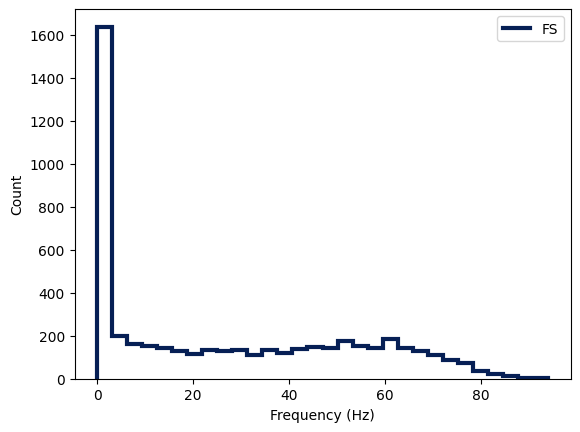

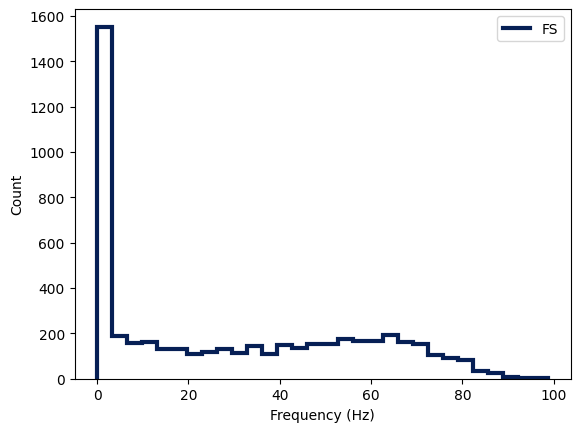

In [6]:
spr.plot_firing_frequency_distribution(bins=30)
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/FS_lateral/figures/spike-frequency-histogram-with-synapses-only-gap-junctions.pdf


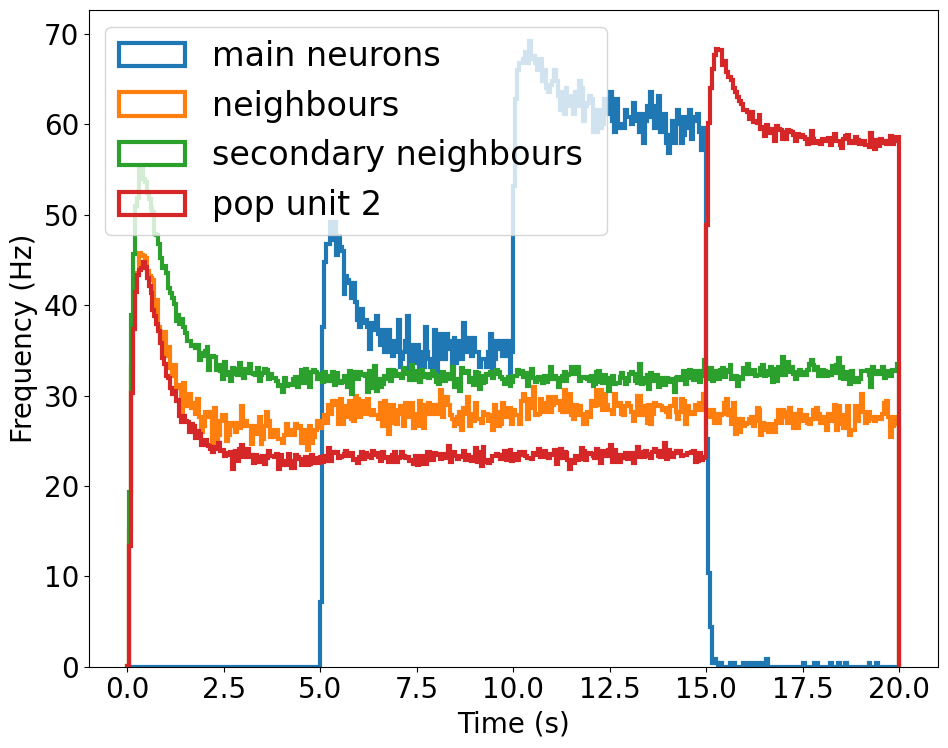

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [10]:
fig_file = "spike-frequency-histogram-with-synapses-only-gap-junctions.pdf"

ax = spr.plot_group_spike_histogram(neuron_id=main_id, label_text="main neurons", show_figure=False, save_figure=False, fig_size=(10,8))
spr.plot_group_spike_histogram(neuron_id=post_id, ax=ax, label_text="neighbours ", show_figure=False, save_figure=False)
spr.plot_group_spike_histogram(neuron_id=secondary_neighbour_id, ax=ax, label_text="secondary neighbours ", show_figure=False, save_figure=False)
spr.plot_group_spike_histogram(neuron_id=pop_unit2, ax=ax, label_text="pop unit 2 ", show_figure=True, save_figure=True, fig_file=fig_file)

Saving figure ../networks/FS_lateral/figures/spike-frequency-histogram-no-synapses-only-gap-junctions.pdf


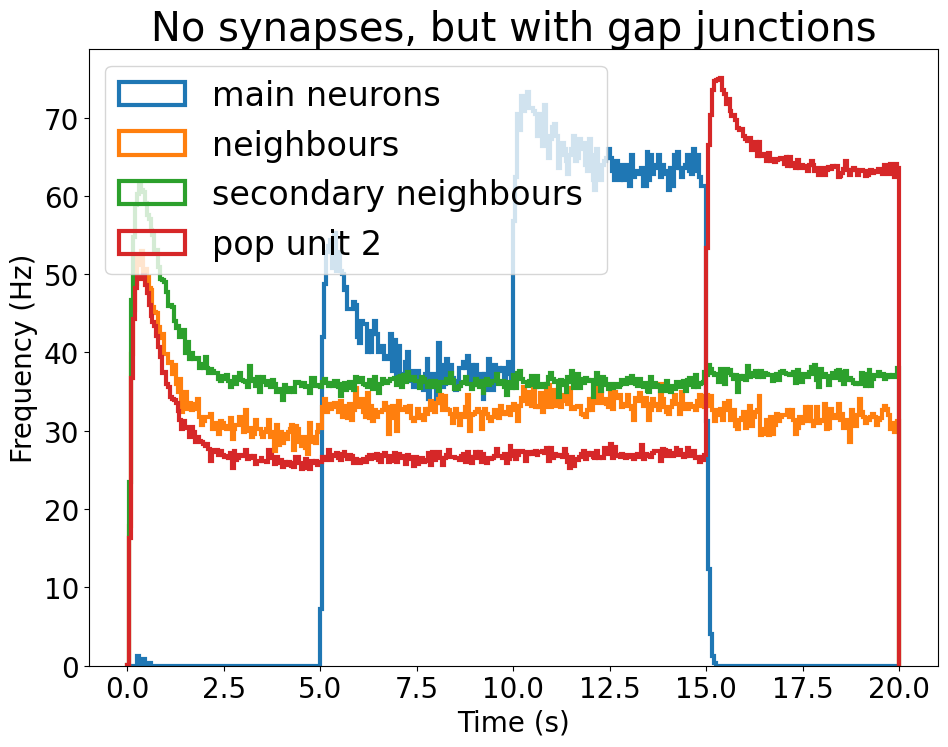

<Axes: title={'center': 'No synapses, but with gap junctions'}, xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [9]:
fig_file_no = "spike-frequency-histogram-no-synapses-only-gap-junctions.pdf"

ax_no = spr_no.plot_group_spike_histogram(neuron_id=main_id, label_text="main neurons", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_group_spike_histogram(neuron_id=post_id, ax=ax_no, label_text="neighbours ", show_figure=False, save_figure=False)
spr_no.plot_group_spike_histogram(neuron_id=secondary_neighbour_id, ax=ax_no, label_text="secondary neighbours ", show_figure=False, save_figure=False)
spr_no.plot_group_spike_histogram(neuron_id=pop_unit2, ax=ax_no, label_text="pop unit 2 ", show_figure=True, save_figure=True, 
                                  title="No synapses, but with gap junctions", fig_file=fig_file_no)

## Gap junction coupled neurons

Lets look closer at the gap junction coupled neurons, to see if there is a larger change in frequency in "GJ neighbours" compared to normal "neighbours".

Saving figure ../networks/FS_lateral/figures/spike-frequency-histogram-no-synapses-only-gap-junctions-GJ-neighbours.pdf


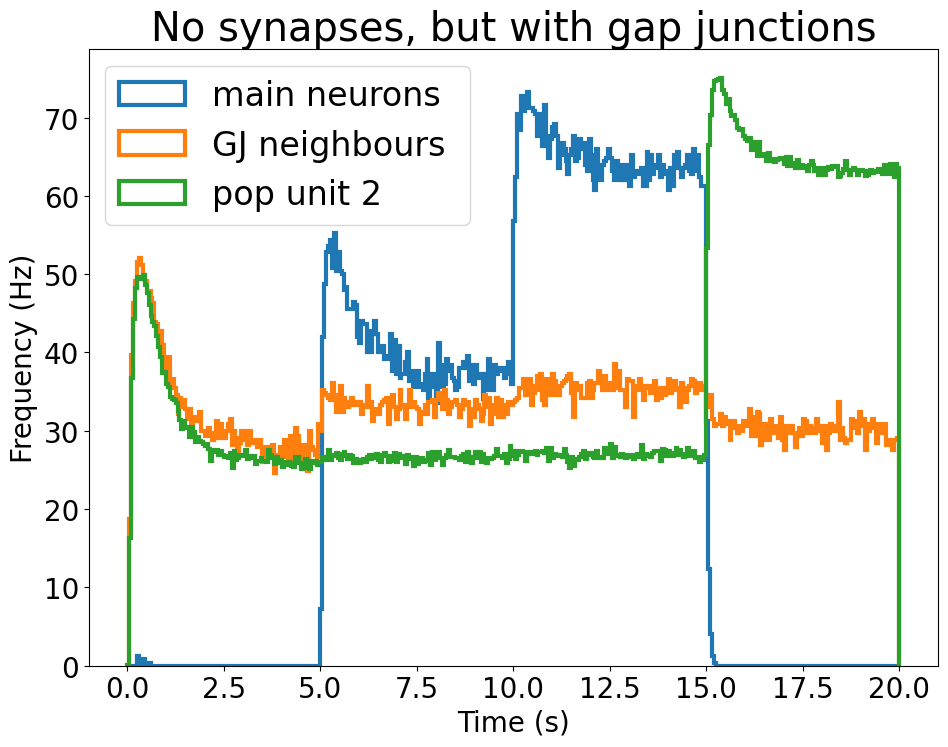

<Axes: title={'center': 'No synapses, but with gap junctions'}, xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [13]:
fig_file_no = "spike-frequency-histogram-no-synapses-only-gap-junctions-GJ-neighbours.pdf"

gj_neigh = gj_neighbours - pop_unit2

ax_no = spr_no.plot_group_spike_histogram(neuron_id=main_id, label_text="main neurons", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_group_spike_histogram(neuron_id=gj_neigh, ax=ax_no, label_text="GJ neighbours ", show_figure=False, save_figure=False)
spr_no.plot_group_spike_histogram(neuron_id=pop_unit2, ax=ax_no, label_text="pop unit 2 ", show_figure=True, save_figure=True, 
                                  title="No synapses, but with gap junctions", fig_file=fig_file_no)

In [14]:
len(post_id), len(gj_neigh)

(100, 66)

In [16]:
len(set(post_id) & gj_neigh)

48

Let's look at the neighbours that do not have gap junctions

Saving figure ../networks/FS_lateral/figures/spike-frequency-histogram-no-synapses-only-gap-junctions-non-GJ-neighbours.pdf


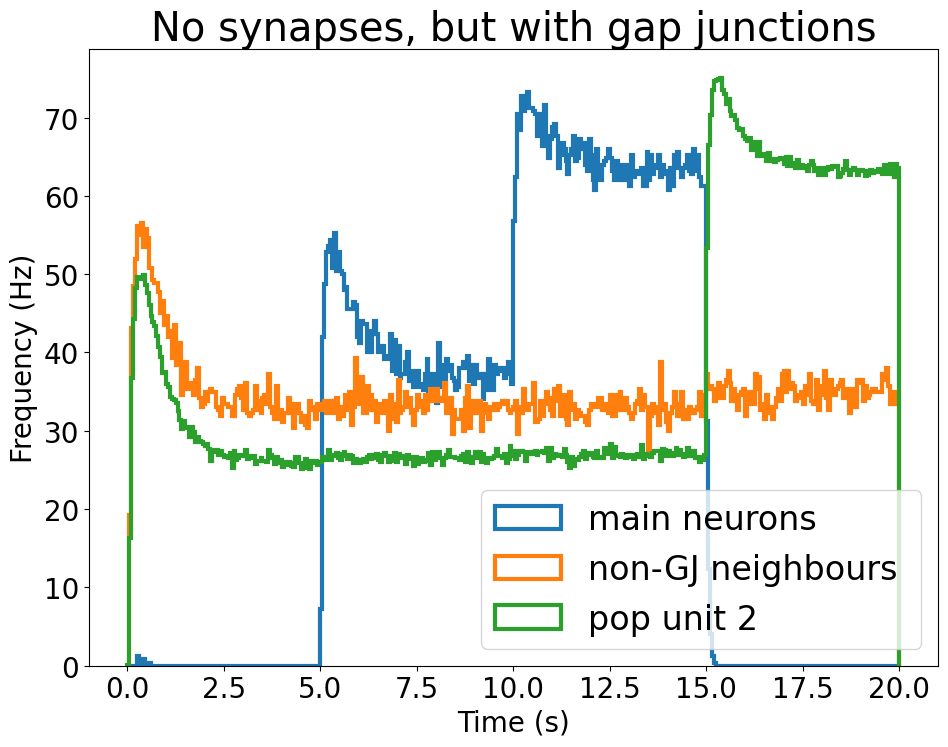

<Axes: title={'center': 'No synapses, but with gap junctions'}, xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [17]:
lonely_neigh = set(post_id) - gj_neigh

fig_file_no = "spike-frequency-histogram-no-synapses-only-gap-junctions-non-GJ-neighbours.pdf"

ax_no = spr_no.plot_group_spike_histogram(neuron_id=main_id, label_text="main neurons", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_group_spike_histogram(neuron_id=lonely_neigh, ax=ax_no, label_text="non-GJ neighbours ", show_figure=False, save_figure=False)
spr_no.plot_group_spike_histogram(neuron_id=pop_unit2, ax=ax_no, label_text="pop unit 2 ", show_figure=True, save_figure=True, 
                                  title="No synapses, but with gap junctions", fig_file=fig_file_no)

Lets look at the neighbours without direct gap junctions, but in the simulation where the GABA was active

Saving figure ../networks/FS_lateral/figures/spike-frequency-histogram-with-synapses-non-GJ-neighbours.pdf


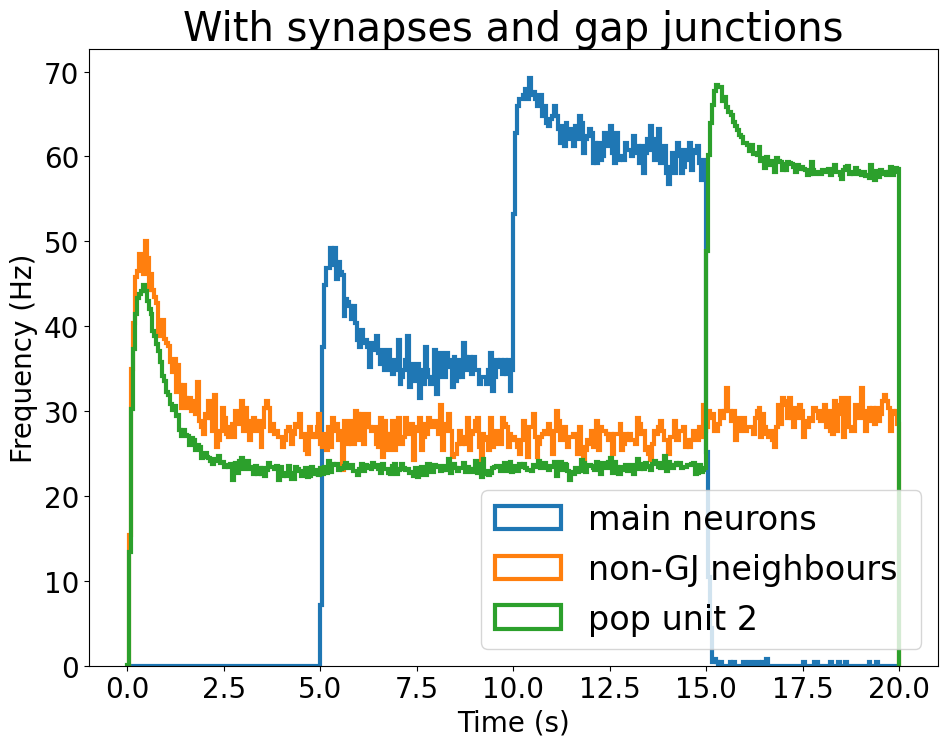

<Axes: title={'center': 'With synapses and gap junctions'}, xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [19]:
lonely_neigh = set(post_id) - gj_neigh

fig_file_nogj = "spike-frequency-histogram-with-synapses-non-GJ-neighbours.pdf"

ax = spr.plot_group_spike_histogram(neuron_id=main_id, label_text="main neurons", show_figure=False, save_figure=False, fig_size=(10,8))
spr.plot_group_spike_histogram(neuron_id=lonely_neigh, ax=ax, label_text="non-GJ neighbours ", show_figure=False, save_figure=False)
spr.plot_group_spike_histogram(neuron_id=pop_unit2, ax=ax, label_text="pop unit 2 ", show_figure=True, save_figure=True, 
                                  title="With synapses and gap junctions", fig_file=fig_file_nogj)